## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load the Boston Housing DataSet from scikit-learn**

In [ ]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()



**Boston_dataset is a dictionary. let's check what it contains**


In [ ]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Load the data into pandas dataframe**

In [ ]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

In [ ]:
boston_df['MEDV'] = boston_dataset.target
#boston_df.drop('Target', axis=1, inplace=True)

**Data preprocessing**

In [ ]:
# check for missing values in all the columns
boston_df.isnull().values.any()

False

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
 14  MEDV     506 non-null    float64
dtypes: float64(15)
memory usage: 59.4 KB


**Data Visualization**

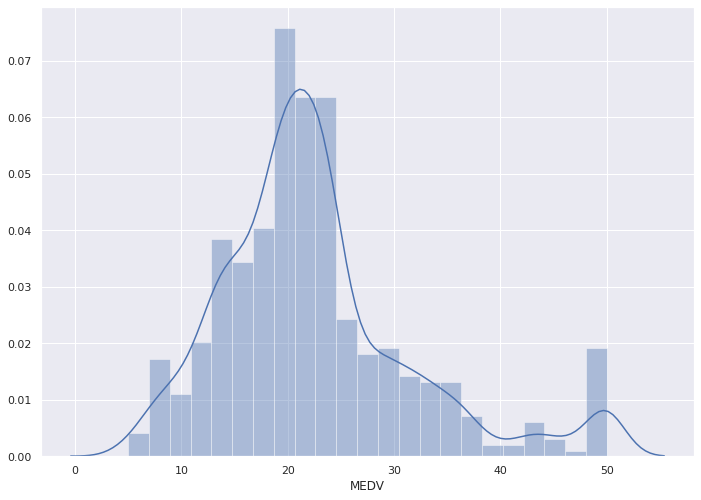

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston_df.MEDV)

**Correlation matrix**

In [ ]:
corr = boston_df.corr()

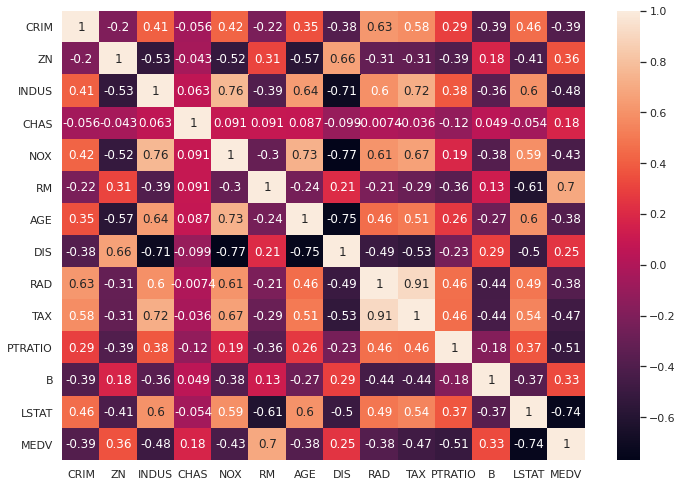

In [ ]:
# use the heatmap function from seaborn to plot the correlation matrix
# Use: annot = True to print the values inside the square
sns.heatmap(corr, annot=True)

**Observations**




*   From coorelation plot: which are the columns that are more highli correlated with **MEDV**: LSTAT, RM

*  Identify 2 columns that are strongly correlated in the features **RAD** and **TAX** We won't include this in our features together to avoid multi-colinearity: INDUS y NOX




### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

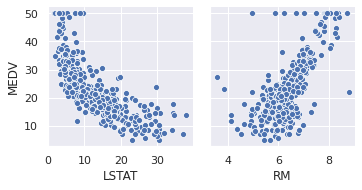

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.pairplot(boston_df,
                 x_vars=["LSTAT", "RM"],
                 y_vars=["MEDV"])

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [ ]:
X = boston_df[['LSTAT', 'RM']]
Y = boston_df.MEDV
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


**Split the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size=0.20, random_state=42)

# assign random_state to any value.This ensures consistency. Print the sahes of the resulting objects


In [ ]:
print(f'\nX_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {Y_train.shape} \ny_test: {Y_test.shape}')


X_train: (404, 2) 
X_test: (102, 2) 
y_train: (404,) 
y_test: (102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports

In [ ]:
# import model and performance metrics
from sklearn import linear_model

#create and train the model
linear_boston = linear_model.LinearRegression()
train = linear_boston.fit(X_train, Y_train)
print('Coefficiens:', train.coef_)
print('Intercept:', train.intercept_)

train

Coefficiens: [-0.63249856  5.46509877]
Intercept: -3.841177079004872


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluate the model performance in the training and testing sets**

In [ ]:
from sklearn.metrics import mean_squared_error,  r2_score

# model evaluation for training set
Y_train_pred = linear_boston.predict(X_train)
print(Y_train_pred.shape)

# The mean squared error
rmse = mean_squared_error(Y_train, Y_train_pred)
# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(Y_train, Y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print(type(Y_train_pred))
print("\n")

# model evaluation for testing set
Y_test_pred = linear_boston.predict(X_test)
print(Y_test_pred.shape)

# The mean squared error
RMSE = mean_squared_error(Y_test, Y_test_pred)
# The coefficient of determination: 1 is perfect prediction
R2 = r2_score(Y_test, Y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('R2 score is {}'.format(R2))
print(type(Y_test_pred))

(404,)
The model performance for training set
--------------------------------------
RMSE is 30.39185519321462
R2 score is 0.6501592679428922
<class 'numpy.ndarray'>


(102,)
The model performance for testing set
--------------------------------------
RMSE is 31.243290601783634
R2 score is 0.5739577415025858
<class 'numpy.ndarray'>


**Lets see the model performance visually. Let's plor y_test vs y_pred**

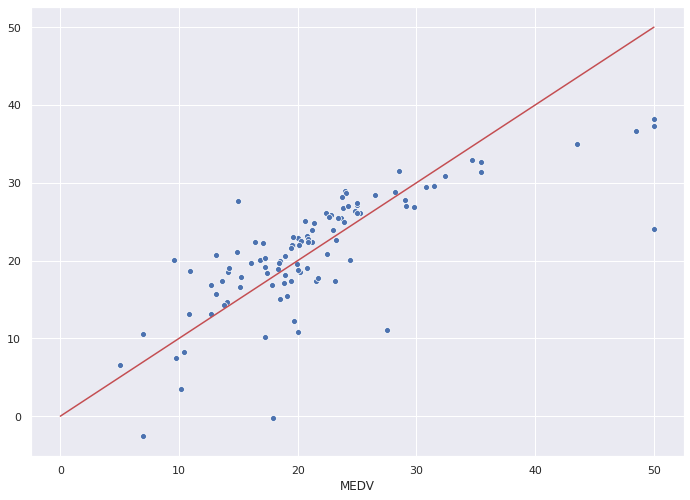

In [ ]:


# plotting the y_test vs y_pred
line = np.arange(0, 50+1)
sns.lineplot(line, line, color = "r")

sns.scatterplot(Y_test, Y_test_pred, color = "b");
# ideally should have been a straight line


# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)

X_train_poly


array([[  1.      ,  24.91    ,   5.304   , 620.5081  , 132.12264 ,
         28.132416],
       [  1.      ,   8.47    ,   5.834   ,  71.7409  ,  49.41398 ,
         34.035556],
       [  1.      ,   7.83    ,   6.031   ,  61.3089  ,  47.22273 ,
         36.372961],
       ...,
       [  1.      ,   5.99    ,   6.635   ,  35.8801  ,  39.74365 ,
         44.023225],
       [  1.      ,  23.27    ,   6.629   , 541.4929  , 154.25683 ,
         43.943641],
       [  1.      ,  10.63    ,   6.405   , 112.9969  ,  68.08515 ,
         41.024025]])

In [ ]:
X_train  #comparar ambas

,LSTAT,RM
477,24.91,5.304
15,8.47,5.834
332,7.83,6.031
423,23.29,6.103
19,11.28,5.727
...,...,...
106,18.66,5.836
270,13.00,5.856
348,5.99,6.635
435,23.27,6.629


In [ ]:
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, Y_train)

Y_train_predicted = poly_model.predict(X_train_poly)

Y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

In [ ]:
# The mean squared error gor train
RMSE_ptr = mean_squared_error(Y_train, Y_train_predicted)
# The coefficient of determination: 1 is perfect prediction
R2_ptr = r2_score(Y_train, Y_train_predicted)

# The mean squared error for test
RMSE_pte = mean_squared_error(Y_test, Y_test_predicted)
# The coefficient of determination: 1 is perfect prediction
R2_pte = r2_score(Y_test, Y_test_predicted)


print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(RMSE_ptr))
print("R2 score of training set is {}".format(R2_ptr))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(RMSE_pte))
print("R2 score of test set is {}".format(R2_pte))

The model performance for the training set
-------------------------------------------
RMSE of training set is 21.056772244023424
R2 score of training set is 0.7576154344716142


The model performance for the test set
-------------------------------------------
RMSE of test set is 18.43377773911108
R2 score of test set is 0.7486318454509432


**Did the model improve using the plolynomila model?**
Hell yes!